In [1]:
!pip install phik

In [2]:
!pip install imblearn

In [3]:
import warnings
import pandas as pd
import numpy as np
import random as rn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import lightgbm 
import catboost
import xgboost
import imblearn
from joblib import Parallel, delayed
from numpy.random import RandomState
from scipy import stats as st
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import phik

warnings.filterwarnings("ignore")

# Telecom

# Plan of the project

# Title - «Clients churn prediction».

# Introduction.
The operator of communication "Niedinogorazryva.com" wants to learn how to predict the outflow of customers. If it turns out that the user plans to leave, he will be offered promo codes and special conditions.

# Target.
To prepare a prototype of a machine learning model that will predict customer churn. Target metric ***AUC-ROC >= 0.85***

# Descripion

1. Introduction (general information according to the provided documentation)


2. Primary study of information.
   
   *2.1. Unloading datasets*
   
   *2.2. Familiarity with the data*
   
   *2.3. General information about the data.*
   
   
3. Data preprocessing.
   
   *3.1. Checking for duplicates. If they are found, we get rid of them*
   
   *3.2. Checking for the presence of passes. Analysis of their possible origin and decision-making on their preprocessing, if necessary.*

*3.3. Reduction of data to the correct type (if necessary)*
   
   *3.4. If necessary, additional data visualization in order to make a decision on further data preprocessing*


4. Data analysis.

   *4.1. Study of preprocessed data*
   
   *4.2. Analysis of tables and decision-making on the construction of a common dataset*
   
   4.3. Determination of the target feature and evaluation of the necessary features for further use in the machine learning model*
   
   
   
   
5. Preparation of machine learning models and checking its quality.

   *5.1. Selection of the target attribute and the rest, according to which we will make a prediction*
   
   *5.2. Separation of data into training and test samples*
   
   *5.3. Training of two different models: classical from the sklearn library and gradient boosting from a third-party library*


6. Project report.

## Introduction (general information according to the provided documentation)

As noted earlier, the telecom operator wants to learn how to predict the outflow of customers, which in the future will help prevent the occurrence of lost profits.

### Description of services

The operator provides two main types of services: 

1. Landline telephone service. It is possible to connect the telephone to several lines at the same time.
2. Internet. The connection can be of two types: via a telephone line (DSL*,* from the English * digital subscriber line*, "digital subscriber line") or fiber optic cable (*Fiber optic*).  

The following services are also available:

- Internet security: antivirus (*DeviceProtection*) and blocking unsafe sites (*OnlineSecurity*);
- Dedicated technical support line (*TechSupport*);
- Cloud file storage for data backup (*OnlineBackup*);
- Streaming TV (*StreamingTV*) and movie catalog (*StreamingMovies*).

Customers can pay for services every month or sign a contract for 1-2 years. Various payment methods and the possibility of receiving an electronic receipt are available.

### Data Description

The data consists of files received from different sources:

- `contract.csv' — information about the contract;
- `personal.csv` — client's personal data;
- `internet.csv' — information about internet services;
- `phone.csv' — information about telephony services.

### Feature designations

• `BeginDate` – the start date of using the services, 

• `EndDate` – the end date of using the services, 

• `Type` – payment type: monthly, annual, etc., 

• `PaperlessBilling` – cashless payment, 

• `PaymentMethod` – payment method, 

• `MonthlyCharges' – monthly expenses for services, 

• `TotalCharges` – total money spent on services 

• `Dependents' – availability of dependents

• `Senior Citizen' – availability of retirement status by age

• `Partner' – the presence of a spouse(s)

• `MultipleLines` – the possibility of maintaining parallel lines during a call

## Initial data exploration.

### Data loading

In [4]:
try:
    df_contract = pd.read_csv('contract.csv')
    df_personal = pd.read_csv('personal.csv')
    df_internet = pd.read_csv('internet.csv')
    df_phone = pd.read_csv('phone.csv')
except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

### Data exploration

In [5]:
df_contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [6]:
df_personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [7]:
df_internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [8]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [9]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [10]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [11]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [12]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [13]:
df_contract.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [14]:
df_personal.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


In [15]:
df_internet.describe().T

,count,unique,top,freq
customerID,5517,5517,7590-VHVEG,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


In [16]:
df_phone.describe().T

,count,unique,top,freq
customerID,6361,6361,5575-GNVDE,1
MultipleLines,6361,2,No,3390


### General info about the data.



1. The datasets are presented differ in sample sizes.

2. There are no data gaps in the datasets.

3. Most of the data belongs to the object class, which should be paid further attention to when preprocessing the data.

4. The average monthly payment for the Internet is 64.76 USD.

## Data preprocessing.

It doesn 't make sense to check for duplicates and missing values separately for each dataset . Based on a preliminary review of the information, there were no omissions in the datasets. It is important to note that all datasets have different sample sizes.

Let's create a new dataset **df**, combining all the existing datasets according to the principle **"we add a smaller one to the larger one"**.

Connection diagram **df_personal**<- **df_contract** <- **df_phone** <- **df_internet**

In [17]:
df_per_cont = df_personal.merge(df_contract, on = 'customerID', how = 'left')
df_per_cont_phone = df_per_cont.merge(df_phone, on = 'customerID', how = 'left')
df = df_per_cont_phone.merge(df_internet, on = 'customerID', how = 'left')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Female,0,No,No,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,Female,0,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,NaN,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Female,0,Yes,No,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,Male,0,No,Yes,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,DSL,Yes,Yes,No,No,No,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


Now we see the missing values in the combined dataset. First of all, they are caused by the fact that the source data differ in sample sizes. Next, we have to pre-process the data

### Check missing values

In [19]:
df.duplicated().sum()

0

As noted earlier, the original datasets are different. You should also pay attention to the type of data present in the table. Perhaps when we adjust the data types, we will have gaps that we don't even know about.

Therefore, we will bring the data to the correct form.

### Converting data to a correct type

In this dataset, all attributes (except `MonthlyCharges` and `Senior Citizen') are of the object type.
Also, signs with dates `BeginDate` and `EndDate` have the type object.
The remaining attributes with the object type are consistent with the logic of the provided data ().

At this stage , the signs: 

- `Total Charges` will be converted to numeric floating point (float);
- `BeginDate` will be converted to datetime64 and rounded up to a year
- `EndDate` will be copied to the new prize as `finish_using`.`End Date` will be converted to datetime64 and rounded up to a year. The value of No in `EndDate` will be replaced by 2020 (Information about contracts is current as of February 1, 2020).
- `finish_using` will bring all records to 0 (if No) and to 1 (if the end date of the contract is specified). Next, this will be our target attribute for the place `EndDate`
- `Senior Citizen` refers to the binary attribute (0,1). Replace it with the object type.

In [20]:
spacings_ids = df['TotalCharges'].str.isspace()
spacings_ids.sum()

11

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['finish_using'] = df['EndDate'].copy()

df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
df['BeginDate'] = df['BeginDate'].dt.year

df.loc[df['EndDate'] == 'No', 'EndDate'] = '2020-02-01 00:00:00'
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d %H:%M:%S')
df['EndDate'] = df['EndDate'].dt.year

df.loc[df['SeniorCitizen'] == 0, 'SeniorCitizen'] = '0'
df.loc[df['SeniorCitizen'] == 1, 'SeniorCitizen'] = '1'

df.head()#2020-01-01

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
0,7590-VHVEG,Female,0,Yes,No,2020,2020,Month-to-month,Yes,Electronic check,...,29.85,NaN,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017,2020,One year,No,Mailed check,...,1889.50,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019,2019,Month-to-month,Yes,Mailed check,...,108.15,No,DSL,Yes,Yes,No,No,No,No,2019-12-01 00:00:00
3,7795-CFOCW,Male,0,No,No,2016,2020,One year,No,Bank transfer (automatic),...,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Female,0,No,No,2019,2019,Month-to-month,Yes,Electronic check,...,151.65,No,Fiber optic,No,No,No,No,No,No,2019-11-01 00:00:00


In [22]:
df['SeniorCitizen'].unique()

array(['0', '1'], dtype=object)

In [23]:
df['finish_using'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [24]:
df['finish_using'] = pd.Series(map(lambda x: 0 if x=='No' else 1, df['finish_using']))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
0,7590-VHVEG,Female,0,Yes,No,2020,2020,Month-to-month,Yes,Electronic check,...,29.85,NaN,DSL,No,Yes,No,No,No,No,0
1,5575-GNVDE,Male,0,No,No,2017,2020,One year,No,Mailed check,...,1889.50,No,DSL,Yes,No,Yes,No,No,No,0
2,3668-QPYBK,Male,0,No,No,2019,2019,Month-to-month,Yes,Mailed check,...,108.15,No,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,Male,0,No,No,2016,2020,One year,No,Bank transfer (automatic),...,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No,0
4,9237-HQITU,Female,0,No,No,2019,2019,Month-to-month,Yes,Electronic check,...,151.65,No,Fiber optic,No,No,No,No,No,No,1


There were gaps in the `Total Charges` column. Let's check the percentage of omissions and display the values on the screen.

In [25]:
df['TotalCharges'].isna().mean()

0.001561834445548772

In [26]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
488,4472-LVYGI,Female,0,Yes,Yes,2020,2020,Two year,Yes,Bank transfer (automatic),...,NaN,NaN,DSL,Yes,No,Yes,Yes,Yes,No,0
753,3115-CZMZD,Male,0,No,Yes,2020,2020,Two year,No,Mailed check,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,No,DSL,Yes,Yes,Yes,No,Yes,Yes,0
1082,4367-NUYAO,Male,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,2020,2020,Two year,No,Credit card (automatic),...,NaN,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,2020,2020,One year,Yes,Mailed check,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,2020,2020,Two year,No,Mailed check,...,NaN,Yes,DSL,No,Yes,Yes,Yes,Yes,No,0


According to the terms of the task, the upload is relevant for February 1, 2020. The missing values in the `Total Charges` column are just given for this date. Given that these omissions are less than 1%, we will get rid of these rows.

In [27]:
df = df.dropna(subset=['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   BeginDate         7032 non-null   int32  
 6   EndDate           7032 non-null   int32  
 7   Type              7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  MultipleLines     6352 non-null   object 
 13  InternetService   5512 non-null   object 
 14  OnlineSecurity    5512 non-null   object 
 15  OnlineBackup      5512 non-null   object 
 16  DeviceProtection  5512 non-null   object 
 17  

Let's check the missing values in the columns that we attached from the df_internet dataset.

In [28]:
df['InternetService'].isna().mean()

0.2161547212741752

In [29]:
df['InternetService'].isna().sum()

1520

The number of passes is 21.6%, which is a significant proportion. Let's consider our dataset taking into account the missing values.

In [30]:
df[df['InternetService'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
11,7469-LKBCI,Male,0,No,No,2018,2020,Two year,No,Credit card (automatic),...,326.80,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16,8191-XWSZG,Female,0,No,No,2015,2020,One year,No,Mailed check,...,1022.95,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21,1680-VDCWW,Male,0,Yes,No,2019,2020,One year,No,Bank transfer (automatic),...,202.25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
22,1066-JKSGK,Male,0,No,No,2019,2019,Month-to-month,No,Mailed check,...,20.15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
33,7310-EGVHZ,Male,0,No,No,2020,2020,Month-to-month,No,Bank transfer (automatic),...,20.20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,2015,2020,Two year,No,Bank transfer (automatic),...,1020.75,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7019,9710-NJERN,Female,0,No,No,2016,2020,Two year,No,Mailed check,...,826.00,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7020,9837-FWLCH,Male,0,Yes,Yes,2019,2020,Month-to-month,Yes,Electronic check,...,239.00,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7030,0871-OPBXW,Female,0,No,No,2019,2020,Month-to-month,Yes,Mailed check,...,39.25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


It can be seen from the data beforehand that the data in the Senior Citizen attribute with the value **0** and the `Multiple Lines` attribute with the value **No**, there is no data in the columns about the Internet services provided. Let's try to check. We will output the data randomly.

In [31]:
df[df['InternetService'].isna()].sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using
662,3030-ZKIWL,Male,0,No,No,2020,2020,Month-to-month,No,Mailed check,...,20.05,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5661,4396-KLSEH,Male,0,No,No,2019,2020,Month-to-month,Yes,Electronic check,...,63.00,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2495,6188-UXBBR,Female,0,Yes,No,2016,2020,One year,Yes,Credit card (automatic),...,814.75,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4006,2607-DHDAK,Male,0,Yes,Yes,2014,2020,Two year,Yes,Credit card (automatic),...,1414.65,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1353,7073-QETQY,Male,0,Yes,Yes,2014,2020,One year,Yes,Electronic check,...,1359.50,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1284,8711-LOBKY,Male,0,Yes,Yes,2015,2020,Two year,No,Mailed check,...,1188.25,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
998,2545-LXYVJ,Male,0,Yes,No,2014,2020,Two year,No,Bank transfer (automatic),...,1492.10,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3531,4311-QTTAI,Female,0,No,No,2018,2020,One year,No,Credit card (automatic),...,295.55,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5455,9970-QBCDA,Female,0,No,No,2019,2020,Month-to-month,No,Credit card (automatic),...,129.55,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5074,2821-WARNZ,Female,0,No,Yes,2016,2020,One year,No,Credit card (automatic),...,921.30,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


According to `Multiple Lines`, the hypothesis was not confirmed. Let's study the values in the `Senior Citizen` column

The unique values are 0 and 1. This attribute refers to binary, so we will convert it to the "Yes/No" format

It should be noted that the number of omissions of 1520 is less than the number of objects with the value **0** in this column. Therefore, this hypothesis disappears.

Let's take a closer look at the features of `Internet Service`, `Online Security`, `Online Backup`, `Device Protection`, `TechSupport`, `StreamingTV`, `StreamingMovies`. 

All signs, except for `Internet Service`, can only have the values Yes or No (that is, an additional service from the provider is connected or not).

Let's take a closer look at `Internet Service`.

In [32]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [33]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
Name: count, dtype: int64

According to the terms, the provider supplies 2 main types of services:

1) Landline telephone service. It is possible to connect the telephone to several lines at the same time.
2) Internet. 

The **DSL** and **Fiber optic** objects are typical for Internet services and additional services are offered only when the Internet is connected.
Therefore, the missing values relate to landline telephone service. Therefore, we will replace the missing values in the `Internet Service` attribute with **phone_line**, and in the other attributes with **No**.

In [34]:
list_of_options = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                   'TechSupport','StreamingTV','StreamingMovies']
df['InternetService'] = df['InternetService'].fillna(' phone_line')

for i in list_of_options:
    df[i] = df[i].fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   BeginDate         7032 non-null   int32  
 6   EndDate           7032 non-null   int32  
 7   Type              7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  MultipleLines     6352 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 
 17  

Next, consider the `Multiple Lines` attribute

In [35]:
df['MultipleLines'].isna().mean()

0.09670079635949944

In [36]:
df['MultipleLines'].value_counts()

MultipleLines
No     3385
Yes    2967
Name: count, dtype: int64

MultipleLines
No     3385
Yes    2967
Name: count, dtype: int64


<Axes: xlabel='MultipleLines'>

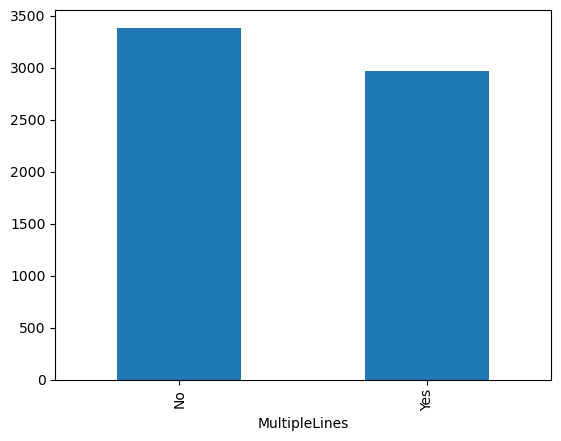

In [37]:
m_lines_frequency = df['MultipleLines'].value_counts()
print(m_lines_frequency)
m_lines_frequency.plot(kind='bar')

As we found out earlier, if a client uses a landline connection, then he does not use the Internet. Therefore, by default, we will replace the default omissions with the value **No**.

In [38]:
df['MultipleLines'] = df['MultipleLines'].fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   BeginDate         7032 non-null   int32  
 6   EndDate           7032 non-null   int32  
 7   Type              7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  MultipleLines     7032 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 
 17  

Data preprocessing is done.

## Data analysis.

### Data exploration

Let's look at how our data is distributed according to the signs `gender`, `Senior citizen`, `Partner`, `Dependents`, `end-use'.

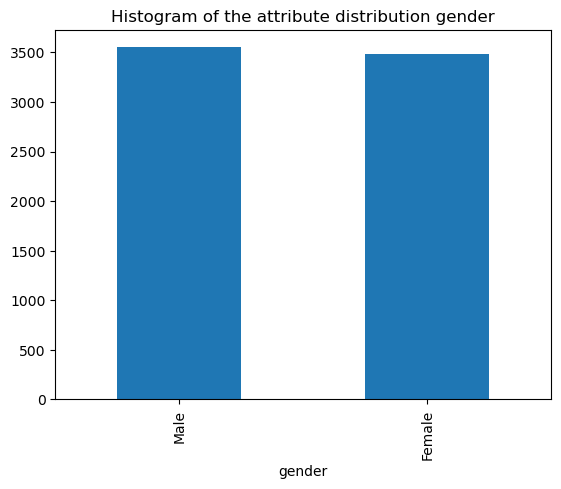

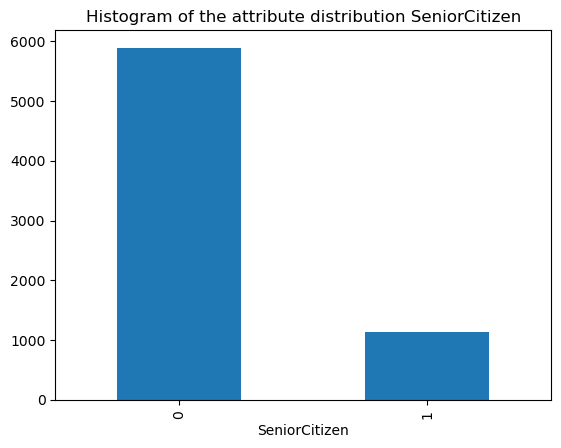

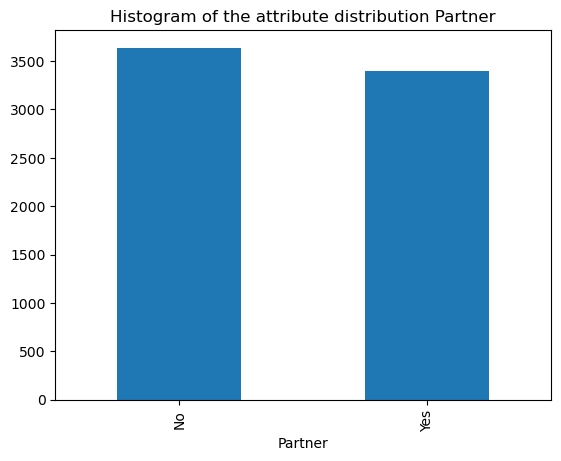

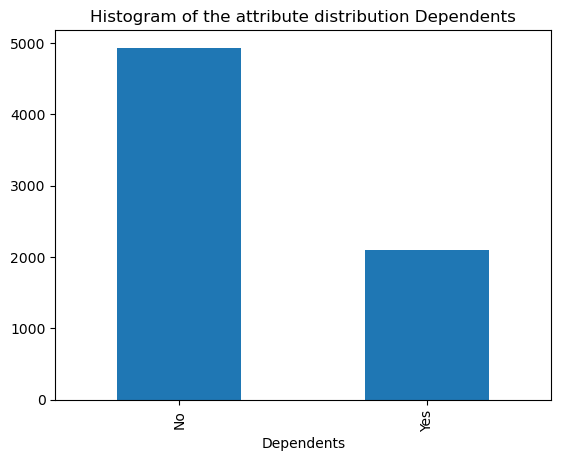

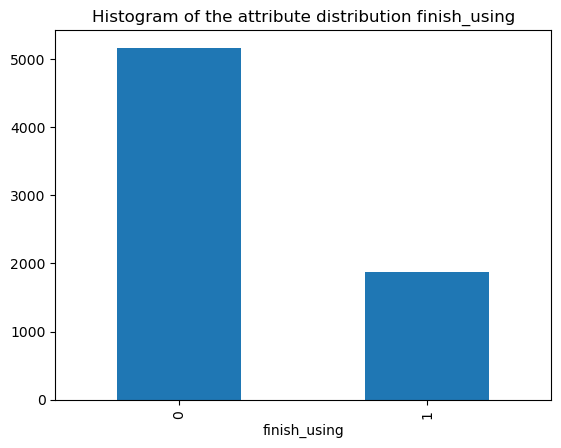

In [39]:
list_of_clients = ['gender','SeniorCitizen','Partner','Dependents','finish_using']

for i in list_of_clients:
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Histogram of the attribute distribution {i}')
    plt.show()

It should be noted that the data on the client's gender and marital status are distributed almost evenly. At the same time, there are fewer values of 1 in the status of the retirement age, hence it can be assumed that 1 is pensioners. There are 2 times fewer clients with children compared to clients without children.

It is important to note that the data on the `finish_using` attribute is not balanced. Therefore, this factor must be further taken into account when training machine learning models.

Additionally, for the study, we may need a feature - the amount of time the client uses the services.

In [40]:
df['duration'] = df['EndDate'] - df['BeginDate']
df['duration'].describe()

count    7032.000000
mean        2.925910
std         2.099719
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: duration, dtype: float64

<Axes: >

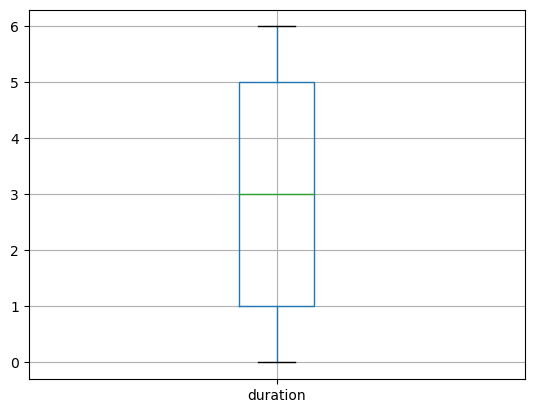

In [41]:
df.boxplot('duration')

The median contract time is 3 years. The main part of the contracts is between 1 and 5 years.

<Axes: >

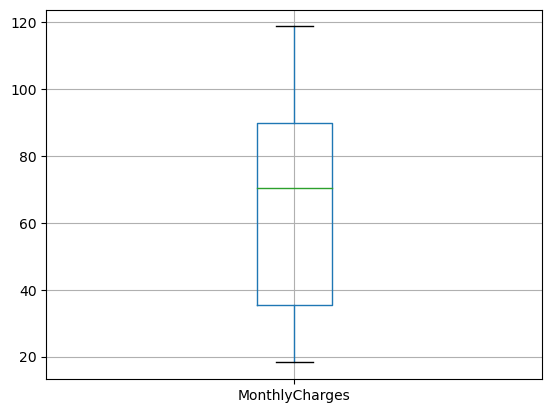

In [42]:
df.boxplot('MonthlyCharges')

The median value of the monthly Internet fee is 70 USD. The main share lies in the range from 35 to 90 USD. months.

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,finish_using,duration
0,7590-VHVEG,Female,0,Yes,No,2020,2020,Month-to-month,Yes,Electronic check,...,No,DSL,No,Yes,No,No,No,No,0,0
1,5575-GNVDE,Male,0,No,No,2017,2020,One year,No,Mailed check,...,No,DSL,Yes,No,Yes,No,No,No,0,3
2,3668-QPYBK,Male,0,No,No,2019,2019,Month-to-month,Yes,Mailed check,...,No,DSL,Yes,Yes,No,No,No,No,1,0
3,7795-CFOCW,Male,0,No,No,2016,2020,One year,No,Bank transfer (automatic),...,No,DSL,Yes,No,Yes,Yes,No,No,0,4
4,9237-HQITU,Female,0,No,No,2019,2019,Month-to-month,Yes,Electronic check,...,No,Fiber optic,No,No,No,No,No,No,1,0


Let's look at how the number of users changed from year to year:
- who continues to use the services
- who stopped using the services.

Text(0, 0.5, 'Number of users')

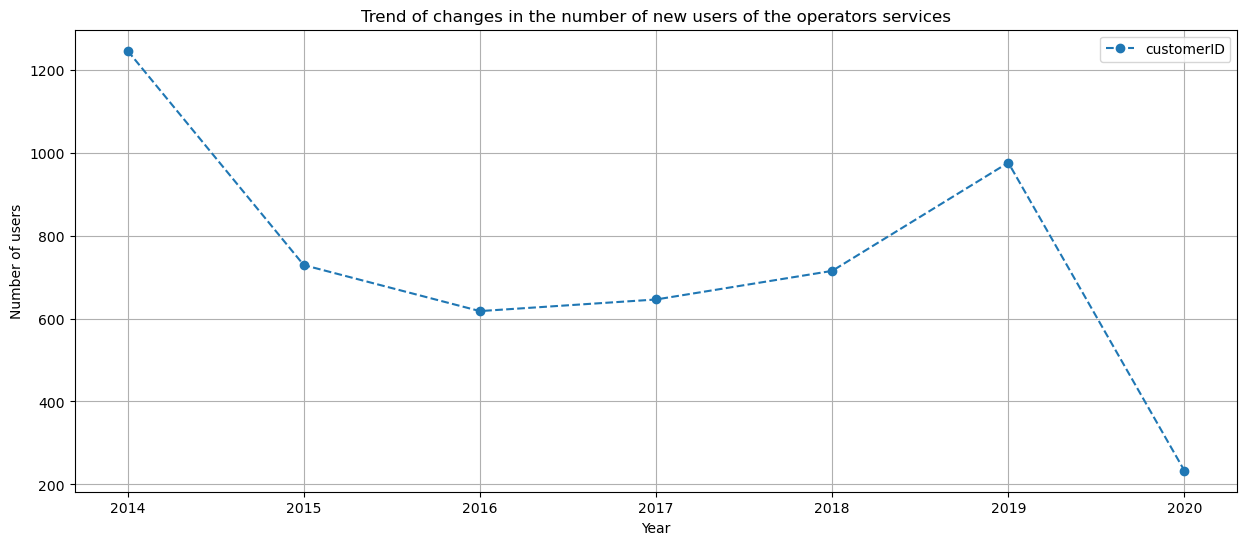

In [44]:
active_users = df.query('finish_using == 0')
active_users.pivot_table(index='BeginDate', 
                           #columns = 'platform',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Trend of changes in the number of new users of the operators services')
plt.xlabel('Year')
plt.ylabel('Number of users')

From the data we observe that from 2014 to 2016 there is a decrease in new users. Further, from 2016 to 2019, there is a gradual increase in the number of users (up to about 1000 people). We remind you that the upload is given by February 1, 2020, so visually there is a decrease in users technically.

Let's look at the trend of users leaving the provider over the years.

Text(0, 0.5, 'Number of users')

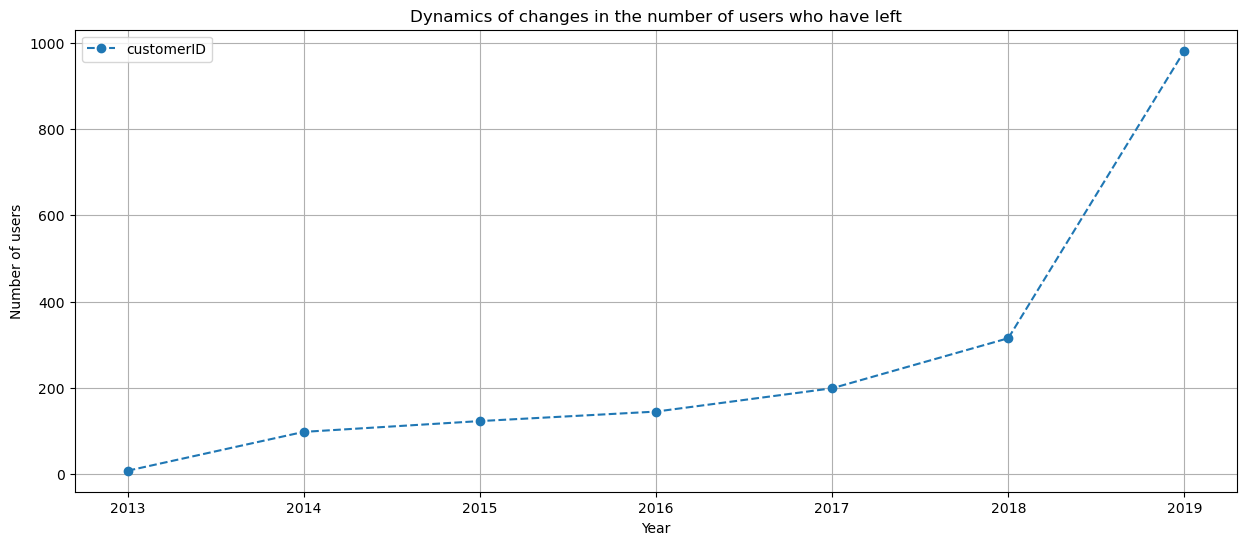

In [45]:
finished_users = df.query('finish_using == 1')
finished_users.pivot_table(index='BeginDate', 
                           #columns = 'platform',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Dynamics of changes in the number of users who have left')
plt.xlabel('Year')
plt.ylabel('Number of users')

В свою очередь, мы наблюдаем тенденцию оттока клиентов с 2013 по 2019 год. Наибольший рост оттока пришелся с 2019 по 2020 год.

Let's try to find out how the number of users (new and departed) changed depending on:
- frequency of payment `Type`
- - payment method `Payment Method`
- - the type of services provided is `Internet Service`

Text(0, 0.5, 'Number of users')

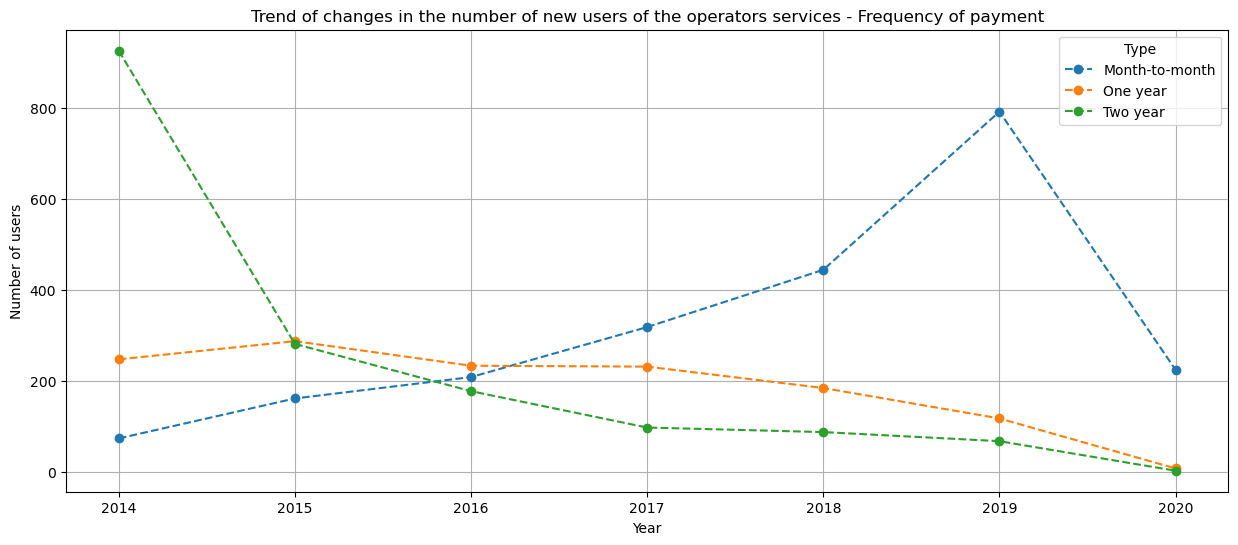

In [46]:
active_users = df.query('finish_using == 0')
active_users.pivot_table(index='BeginDate', 
                           columns = 'Type',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Trend of changes in the number of new users of the operators services - Frequency of payment')
plt.xlabel('Year')
plt.ylabel('Number of users')

Text(0, 0.5, 'Number of users')

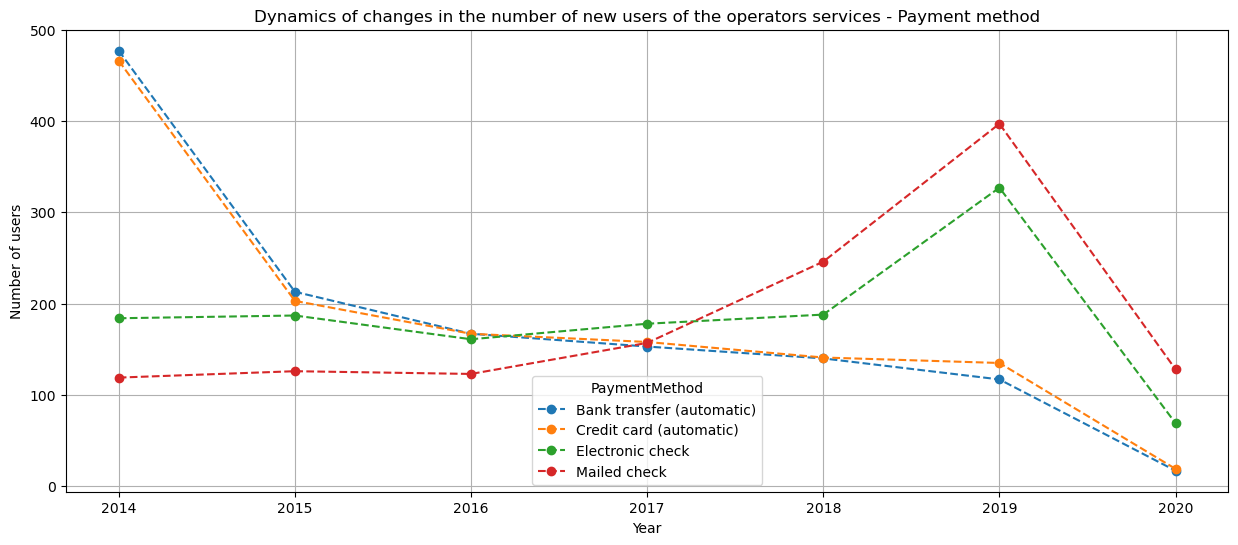

In [47]:
active_users = df.query('finish_using == 0')
active_users.pivot_table(index='BeginDate', 
                           columns = 'PaymentMethod',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Dynamics of changes in the number of new users of the operators services - Payment method')
plt.xlabel('Year')
plt.ylabel('Number of users')

Text(0, 0.5, 'Number of users')

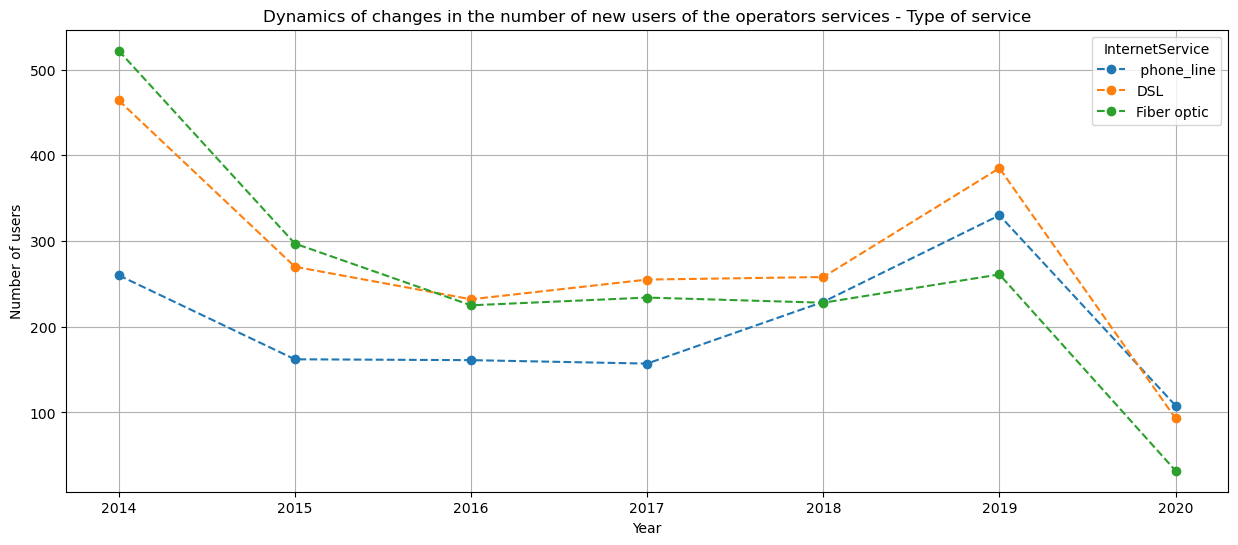

In [48]:
active_users = df.query('finish_using == 0')
active_users.pivot_table(index='BeginDate', 
                           columns = 'InternetService',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Dynamics of changes in the number of new users of the operators services - Type of service')
plt.xlabel('Year')
plt.ylabel('Number of users')

According to the dynamics of changes in new users, it can be seen that:
1. The number of clients with monthly payment for services is growing. The number of clients with payment for 1-2 years in advance is decreasing.

2. The number of customers who pay by automatic debit and credit card. New users prefer to pay based on the receipts they receive.

3. Most of all, new users have been using the DSL and phone_line connection type since 2015.

Consider the information on the outgoing user.

Text(0, 0.5, 'Number of users')

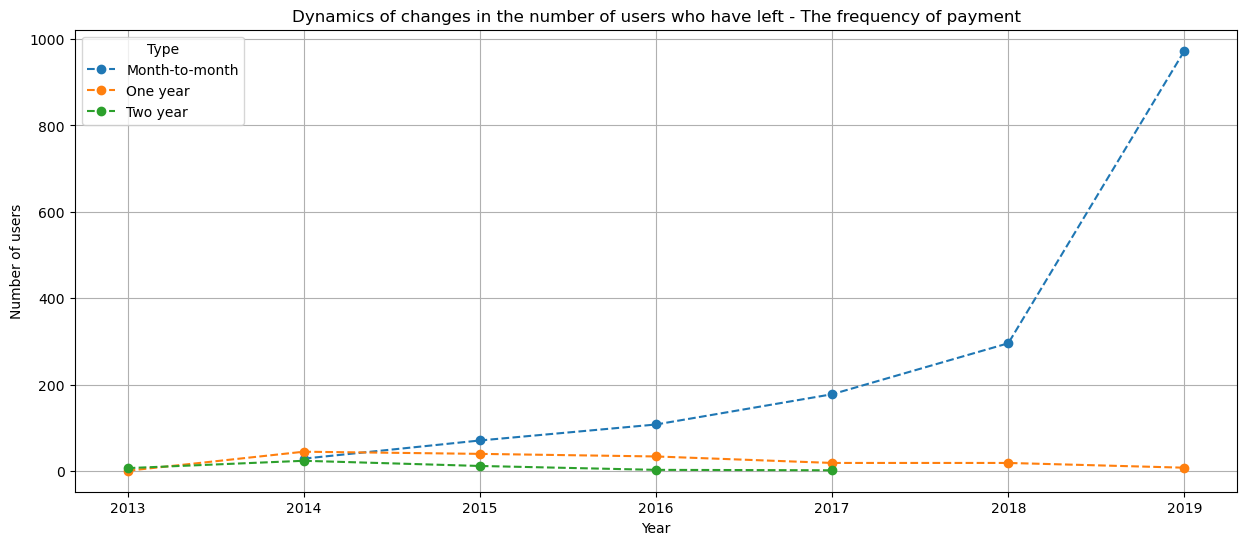

In [49]:
finished_users = df.query('finish_using == 1')
finished_users.pivot_table(index='BeginDate', 
                           columns = 'Type',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Dynamics of changes in the number of users who have left - The frequency of payment')
plt.xlabel('Year')
plt.ylabel('Number of users')

Text(0, 0.5, 'number of users')

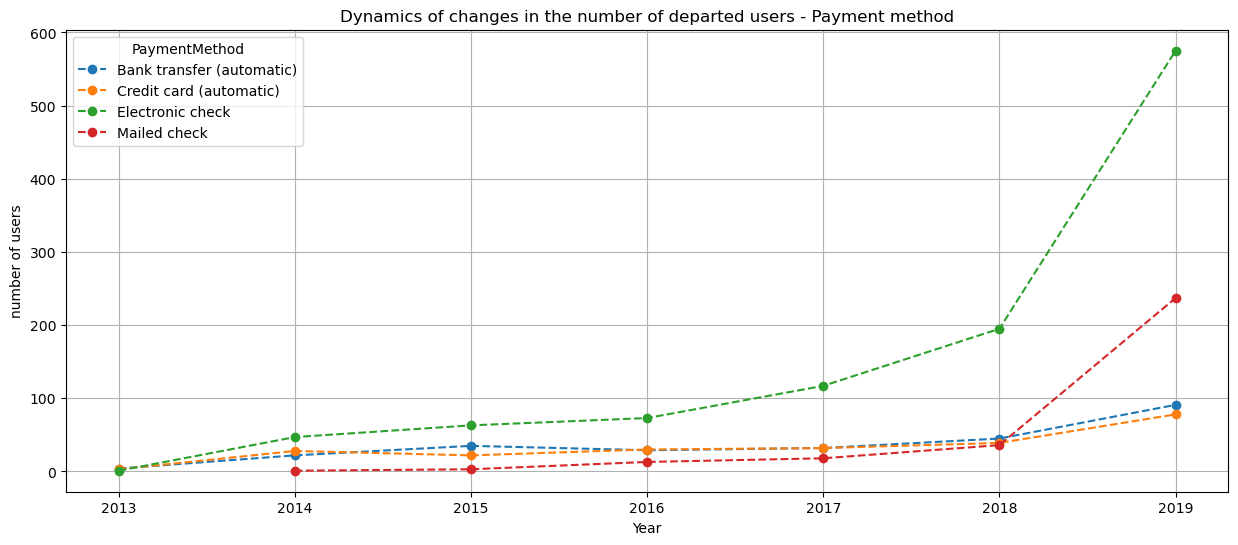

In [50]:
finished_users = df.query('finish_using == 1')
finished_users.pivot_table(index='BeginDate', 
                           columns = 'PaymentMethod',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Dynamics of changes in the number of departed users - Payment method')
plt.xlabel('Year')
plt.ylabel('number of users')

Text(0, 0.5, 'Number of users')

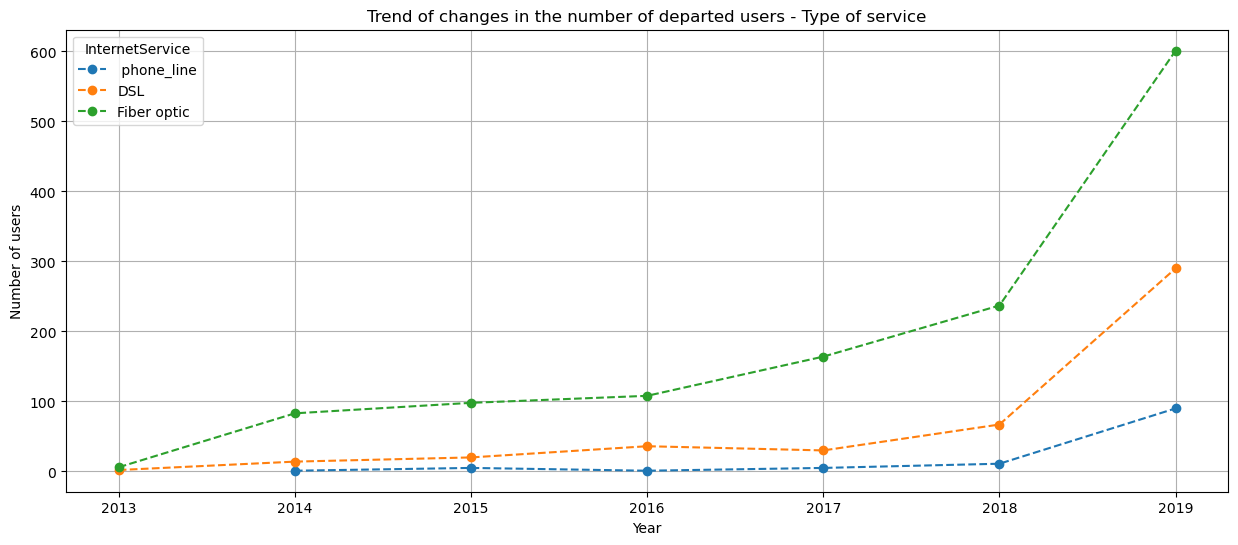

In [51]:
finished_users = df.query('finish_using == 1')
finished_users.pivot_table(index='BeginDate', 
                           columns = 'InternetService',
                           values='customerID', aggfunc='count').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Trend of changes in the number of departed users - Type of service')
plt.xlabel('Year')
plt.ylabel('Number of users')

According to the dynamics of user withdrawal, it can be seen that:
1. Most users leave with a monthly payment. The share of those who left with a prepayment for 1-2 years is insignificant.

2. The number of customers who have left, regardless of the payment method, is growing. .

3. The number of customers who have left, regardless of the type of previously connected service, is growing. Most of all, those who have a fiber-optic connection are leaving

Let's study how the average check has changed over the years. To do this, consider the graph of a box with a mustache for all years.

Text(0, 0.5, 'Month payment, у.е.')

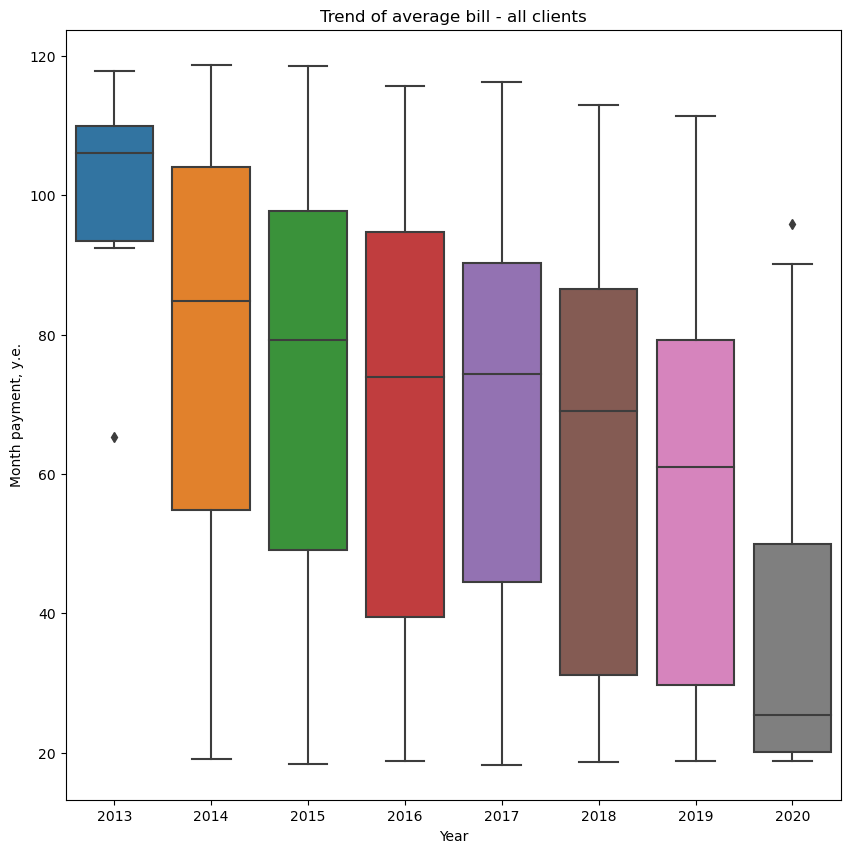

In [52]:
plt.figure(figsize=(10, 10))
sns.boxplot(data = df, y = 'MonthlyCharges', x='BeginDate').set(title = 'Dynamics of the average check by year - all customers',
                                                                        xlabel = 'Year',
                                                                        ylabel = 'Month payment, USD')

plt.title('Trend of average bill - all clients')
plt.xlabel('Year')
plt.ylabel('Month payment, у.е.')

For all clients, we observe a tendency to decrease the average check.

Text(0, 0.5, 'Month payment, USD')

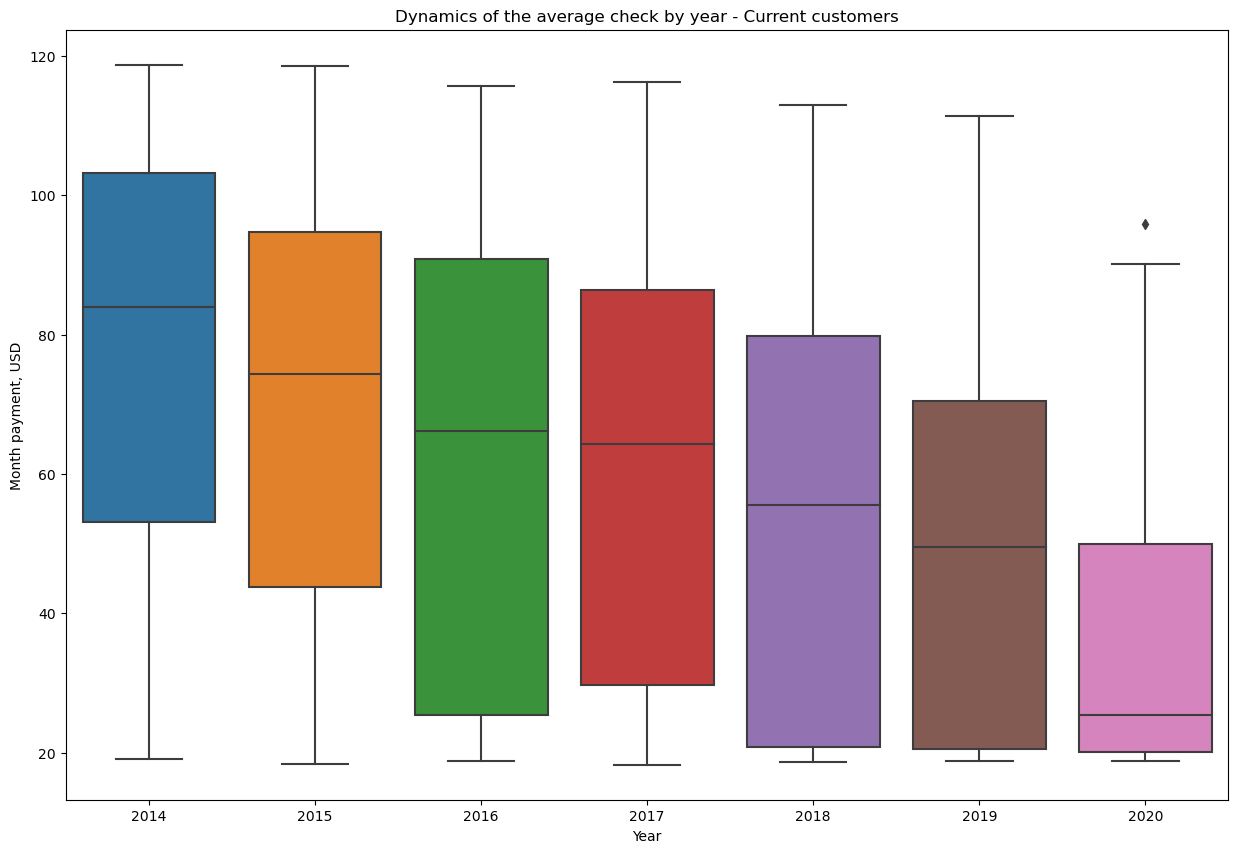

In [53]:
plt.figure(figsize=(15, 10))
sns.boxplot(data = df.query('finish_using == 0'), y = 'MonthlyCharges', x='BeginDate').set(title = 'Dynamics of the average check by year - Current customers',
                                                                        xlabel = 'Year',
                                                                        ylabel = 'Month payment, USD')

plt.title('Dynamics of the average check by year - Current customers')
plt.xlabel('Year')
plt.ylabel('Month payment, USD')

Text(0, 0.5, 'Month payment')

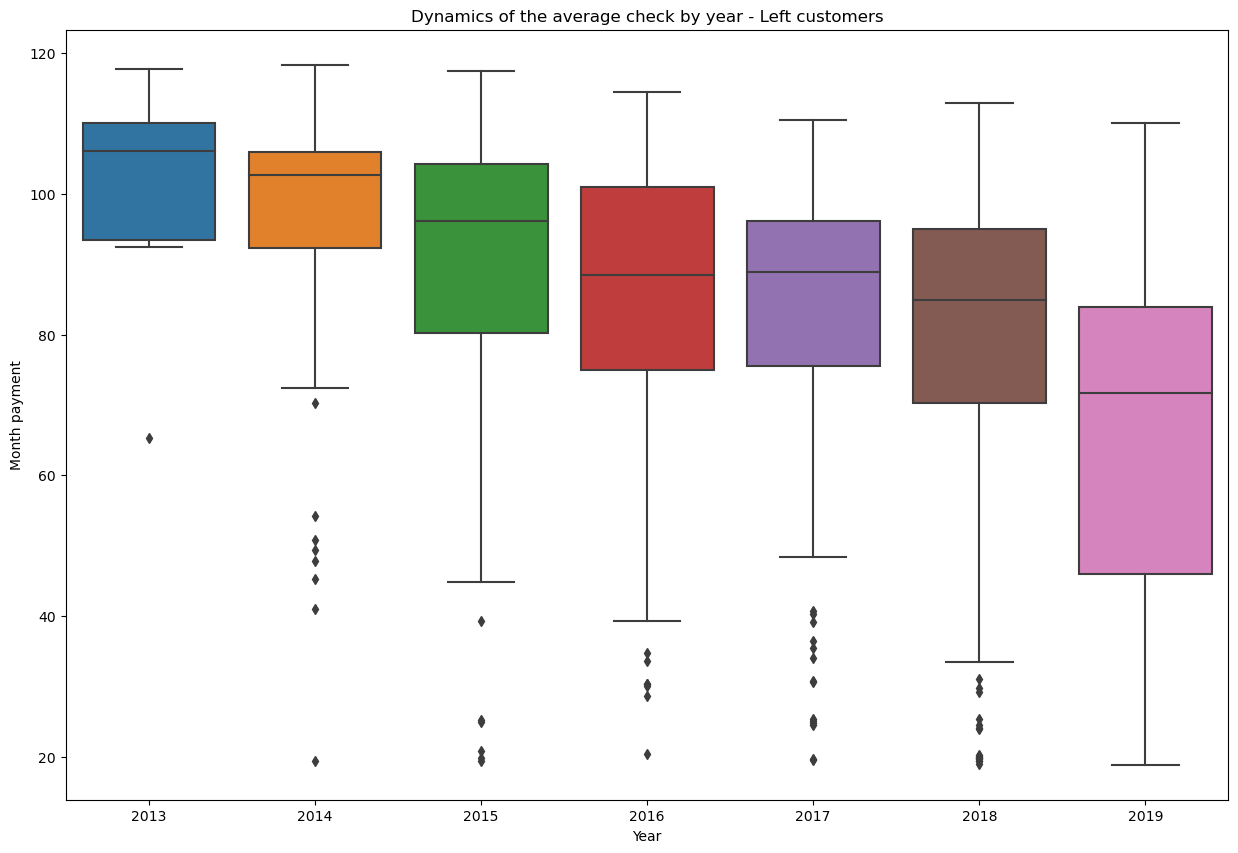

In [54]:
plt.figure(figsize=(15, 10))
sns.boxplot(data = df.query('finish_using == 1'), y = 'MonthlyCharges', x='BeginDate').set(title = 'Dynamics of the average check by year - Left customers',
                                                                        xlabel = 'Year',
                                                                        ylabel = 'Month payment, USD')

plt.title('Dynamics of the average check by year - Left customers')
plt.xlabel('Year')
plt.ylabel('Month payment')

We can see that the median values of monthly payments for departed customers are higher (above 80 units) than for current ones (below 80 units). As a result, they paid more.

### Analyzing tables and making a decision on building a common dataset

Datasets have already been merged into a single **df**. A preliminary analysis has been carried out. Let's check the correlation of the features with each other. Let's apply the phi-correlation tool for a mixed set of features

In [55]:
phik_martrix = df.phik_matrix()

interval columns not set, guessing: ['BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges', 'finish_using', 'duration']


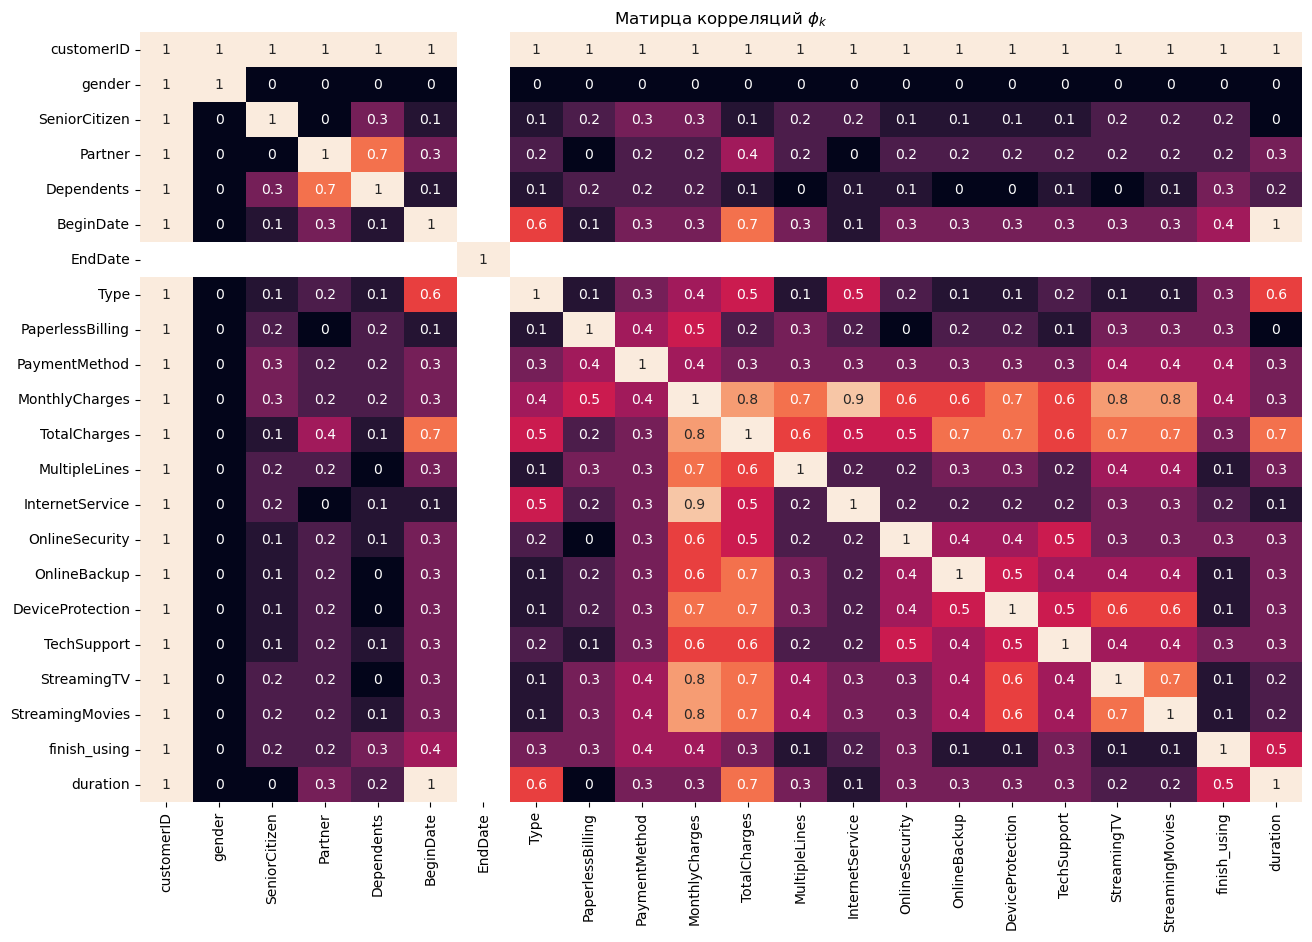

In [56]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=phik_martrix.round(1), annot=True, square=False,
            cbar=False)\
.set(title='Матирца корреляций $\phi_k$');


The matrix for the criterion `ϕk` shows relatively strong correlations between:

- - MonthlyCharges and Total Charges (0.8), Multiple Lines (0.7), Internet Service (0.9), Device Protection(0.7), Streaming TV (0.8), StreamingMovies (0.8)

- Partner and Dependents (0,7)

The correlation for the rest of the signs looks much weaker.

### Determination of the target feature and evaluation of the necessary features for further use in the machine learning model

As noted above in clause 3.3. the target feature will be `finish-using` - this is a derivative feature from `EndDate`. The machine learning model will have to determine whether the client will leave or not.

The signs by which we will predict whether the customer will leave or not are all, with the exception of `BeginDate`, `EndDate`, `CustomerID` to avoid data leakage.

## Preparation of machine learning models and quality control

In [59]:
features = df.drop(['BeginDate','EndDate','finish_using','customerID'], axis=1)
target = df['finish_using']

features_train,features_test, target_train, target_test = train_test_split(features,
                                                                           target,
                                                                           test_size=0.25, random_state=130223)

In [60]:
cat_features = features_train.select_dtypes(include='object').columns.to_list()
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Type',
 'PaperlessBilling',
 'PaymentMethod',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [61]:
num_features = features_train.select_dtypes(include=['int','float64']).columns.to_list()
num_features

['MonthlyCharges', 'TotalCharges', 'duration']

### Machine laerning

**Logistic Regression**

In [62]:
values_list =[]

In [63]:

def make_some_pipe(model_name, model, parameters, features_train, target_train):
    
    colunm_transformer = make_column_transformer((make_pipeline(StandardScaler(), num_features)),
                                            (make_pipeline(OneHotEncoder(drop='first',
                                                                         handle_unknown='ignore')), cat_features))
    
    
    gs = GridSearchCV(make_pipeline(colunm_transformer, model), parameters,n_jobs=-1,cv=5, scoring='roc_auc')
    print('Estimator',model_name)
    gs.fit(features_train, target_train)
    values_list.append(gs.best_score_)
    dump_file = 'best_estimator.plk'
    joblib.dump(gs.best_estimator_, dump_file, compress=1)
    print('Best training roc_auc: %3f',gs.best_score_)
    print('Best params of model: %3f',gs.best_params_)


In [64]:
%%time
make_some_pipe(model_name = 'LogisticRegression',
               model = LogisticRegression(
                   random_state=1302023,max_iter=10000,class_weight = 'balanced'
               ),
               parameters = [
                   {'logisticregression__solver':['liblinear'],
                   'logisticregression__penalty':['l1','l2'],
                   'logisticregression__C':[3.0, 0.5]}
                    ],
               features_train = features_train,
               target_train = target_train)


Estimator LogisticRegression
Best training roc_auc: %3f 0.8899742972490714
Best params of model: %3f {'logisticregression__C': 3.0, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
CPU times: user 220 ms, sys: 9.89 ms, total: 230 ms
Wall time: 781 ms


In [65]:
model_logist_r = joblib.load('best_estimator.plk')
joblib.dump(model_logist_r, 'model_logist_r.plk', compress=1)

['model_logist_r.plk']

Logistic regression showed a good result on the roc_auc metric, namely 0.89

**RandomForestClassifier**

In [66]:
%%time
make_some_pipe(model_name = 'RandomForestClassifier',
               model = RandomForestClassifier(
                   random_state=1302023, class_weight = 'balanced'
               ),
               parameters = [
                   {'randomforestclassifier__n_estimators': range(10, 51, 10), 
                   'randomforestclassifier__max_depth': range(2, 10, 1),
                   'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
                   'randomforestclassifier__min_samples_split': range(2, 11)}
                    ],
               features_train = features_train,
               target_train = target_train)

Estimator RandomForestClassifier
Best training roc_auc: %3f 0.882225968950074
Best params of model: %3f {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__min_samples_split': 9, 'randomforestclassifier__n_estimators': 50}
CPU times: user 18.9 s, sys: 1.24 s, total: 20.1 s
Wall time: 1min 6s


In [67]:
model_ran_for = joblib.load('best_estimator.plk')
joblib.dump(model_logist_r, 'model_ran_for.plk', compress=1)

['model_ran_for.plk']

The random forest model also showed excellent results for the metric roc_auc = 0.834. This value is 1 thousandth lower than the logistic regression model.

**CatBoostClassifier**

In [68]:
def learning_boost(model_name, empty_model, parametrs, features, target):
    gs_boost = GridSearchCV(empty_model,
                           parametrs, cv=5,
                           scoring='roc_auc')
    print('Estimator', model_name)
    gs_boost.fit(features, target)
    values_list.append(gs_boost.best_score_)
    dump_file = 'best_estimator.plk'
    joblib.dump(gs_boost.best_estimator_, dump_file, compress=1)
    print('Best training roc_auc:',gs_boost.best_score_)
    print('Best params of model:',gs_boost.best_params_)

In [69]:

%%time
learning_boost(model_name = 'CatBoostClassifier',
               empty_model = CatBoostClassifier(
                  random_state=1302023,
                  verbose=False,
                  cat_features = cat_features),
                  parametrs = [{'n_estimators': range(10,50,10),
                                'max_depth': range(1,10),
                                'learning_rate': (0.01, 0.1),
                                'reg_lambda': (3,4,5)}],
               features = features_train,
               target =target_train)


Estimator CatBoostClassifier
Best training roc_auc: 0.8959732901264177
Best params of model: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 40, 'reg_lambda': 3}
CPU times: user 2min 6s, sys: 1min 2s, total: 3min 8s
Wall time: 1min 10s


In [70]:
model_catboost = joblib.load('best_estimator.plk')
joblib.dump(model_logist_r, 'model_catboost.plk', compress=1)

['model_catboost.plk']

**LGBMClassifier**

In [71]:
for i in cat_features:
    features_train[i] = features_train[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   BeginDate         7032 non-null   int32  
 6   EndDate           7032 non-null   int32  
 7   Type              7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   PaymentMethod     7032 non-null   object 
 10  MonthlyCharges    7032 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  MultipleLines     7032 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 
 17  

In [72]:
%%time
learning_boost(model_name = 'LGBMClassifier',
               empty_model = LGBMClassifier(
                  random_state=1302023,
                  class_weight='balanced'),
                  parametrs = [{'boosting_type': ['gbdt', 'dart'],
                           'n_estimators': range (10, 51, 10),
                           }],
               features = features_train,
               target =target_train)

Estimator LGBMClassifier
Best training roc_auc: 0.911378785309104
Best params of model: {'boosting_type': 'gbdt', 'n_estimators': 50}
CPU times: user 24.2 s, sys: 4.58 s, total: 28.8 s
Wall time: 3.17 s


In [73]:
model_lgbm = joblib.load('best_estimator.plk')
joblib.dump(model_logist_r, 'model_lgbm.plk', compress=1)

['model_lgbm.plk']

In [74]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='prior')
dummy_model.fit(features_train, target_train)
predictions_train = dummy_model.predict_proba(features_train)[:, 1]

print(f'DummyClassifier - AUC-ROC: {roc_auc_score(target_train, predictions_train)}')

DummyClassifier - AUC-ROC: 0.5


**Conclusions on the selection and training of models on the training sample**

In [75]:
models_names = ['LogisticRegression','RandomForestClassifier','CatBoostClassifier','LGBMClassifier']

results = pd.DataFrame(data=values_list,index=models_names,columns=['ROC_AUC'])
results.sort_values('ROC_AUC',ascending=False)

,ROC_AUC
LGBMClassifier,0.911379
CatBoostClassifier,0.895973
LogisticRegression,0.889974
RandomForestClassifier,0.882226


According to the training results, we see that the LGBMClassifier model showed the best AUC-ROC value of 0.91.

Let's test the model on a test sample.

In [76]:
cat_features_test = features_test.select_dtypes(include='object').columns.to_list()
num_features_test = features_test.select_dtypes(include=['int','float64']).columns.to_list()

In [77]:
for i in cat_features_test:
    features_test[i] = features_test[i].astype('category')


In [78]:
model_lgbm = joblib.load('model_lgbm.plk')
pred_LGBMClassifier_test = model_lgbm.predict(features_test)
predictions_test = model_lgbm.predict_proba(features_test)[:, 1]

print(f'LGBMClassifier - Accuracy: {accuracy_score(target_test, pred_LGBMClassifier_test)}')
print(f'LGBMClassifier - AUC-ROC: {roc_auc_score(target_test, predictions_test)}')


LGBMClassifier - Accuracy: 0.8111490329920364
LGBMClassifier - AUC-ROC: 0.9013800840867755


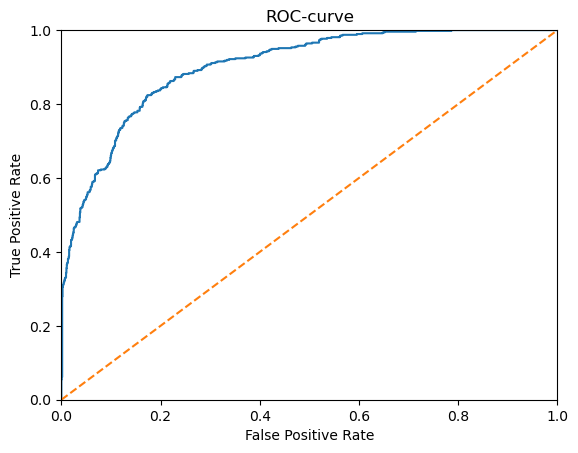

In [79]:
fpr, tpr, thresholds = roc_curve(target_test, predictions_test)# < напишите код здесь >
plt.figure()


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')



plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

**Conlusion**.

According to the results of checking the models, the best result for the AUC-ROC 0.90 metric was shown by the LGBMClassifier model with the parameters {'boosting_type': 'gbdt', 'n_estimators': 50}. The Accuracy value is 0.81.

The value of the target metric AUC-ROC >= 0.85 has been reached in the test sample.

## Results of the research.

According to the terms of reference from the telecom operator "Niedinogorazryva.<url>" we have prepared a machine learning model, which, according to the provided lists, should predict whether the client will stop using communication services or not.

The work consists of the following key stages:

* Primary study of information*. According to the results of the data upload, it was noted that 4 datasets provided by the customer differ in sample sizes. This information had to be taken into account during the subsequent consolidation of datasets.


* *Data preprocessing*. During preprocessing, the absence of explicit duplicates was verified. After combining the datasets, technical gaps were formed, which were filled with values with "plugs" depending on specific conditions. Also, all the necessary data were brought to the correct type.


* *Data analysis*. During the study of the data, the fact of unbalance of the sample by target was reflected (this factor was further taken into account in the preparation of machine learning models). The main trends in the care of current customers and the dynamics of the emergence of new customers are investigated. The target prize was also defined as `finish_date`, which is derived from the original feature `EndDate`. 


* *Preparation of machine learning models and quality control*. RandomForestClassifier and LGBMClassifier were taken as machine learning models for consideration. According to the results of model training and parameter selection, the LGBMClassifier model proved to be the most successful (AUC-ROC reached 0.91 in the training sample).


**Detailing  machine learning model**

The size of the original dataset df = (7032, 19)

The size of the training sample features_train_L = (5274, 18)

Test sample size features_test_L = (1758, 18)

*Target attribute* = `finish_date'. This is a derived attribute from the original `EndDate'.

**Signs for prediction* = `gender`, `Senior Citizen', `Partner', `Dependents', `Type`,
       ``Paperless Billing`, `Payment Method`, `Monthly Charges`, `Total Charges`,
       ``Multiple Lines`, `Internet Service`, `Online Security`, `Online Backup`,
       ``Device Protection`, `TechSupport`, `Streaming TV`, `StreamingMovies`,
       `finish_using`, `duration`.  (`duration` is a derived attribute.)

Parameter parameter random_state = 130223

**Final model**

```python
model_LGBMClassifier = LGBMClassifier(boosting_type = 'gb dt', class_weight = 'balanced',
                                      n_estimators = 50 ,random_state = 130223)
```

**ROC-AUC metric on the test sample**
0.9